In [193]:
import scipy.io.wavfile as wav
from scipy import signal
import sounddevice
import numpy as np
import matplotlib.pyplot as plt
import os

os.makedirs("./lab2_plots", exist_ok=True)

Ex1


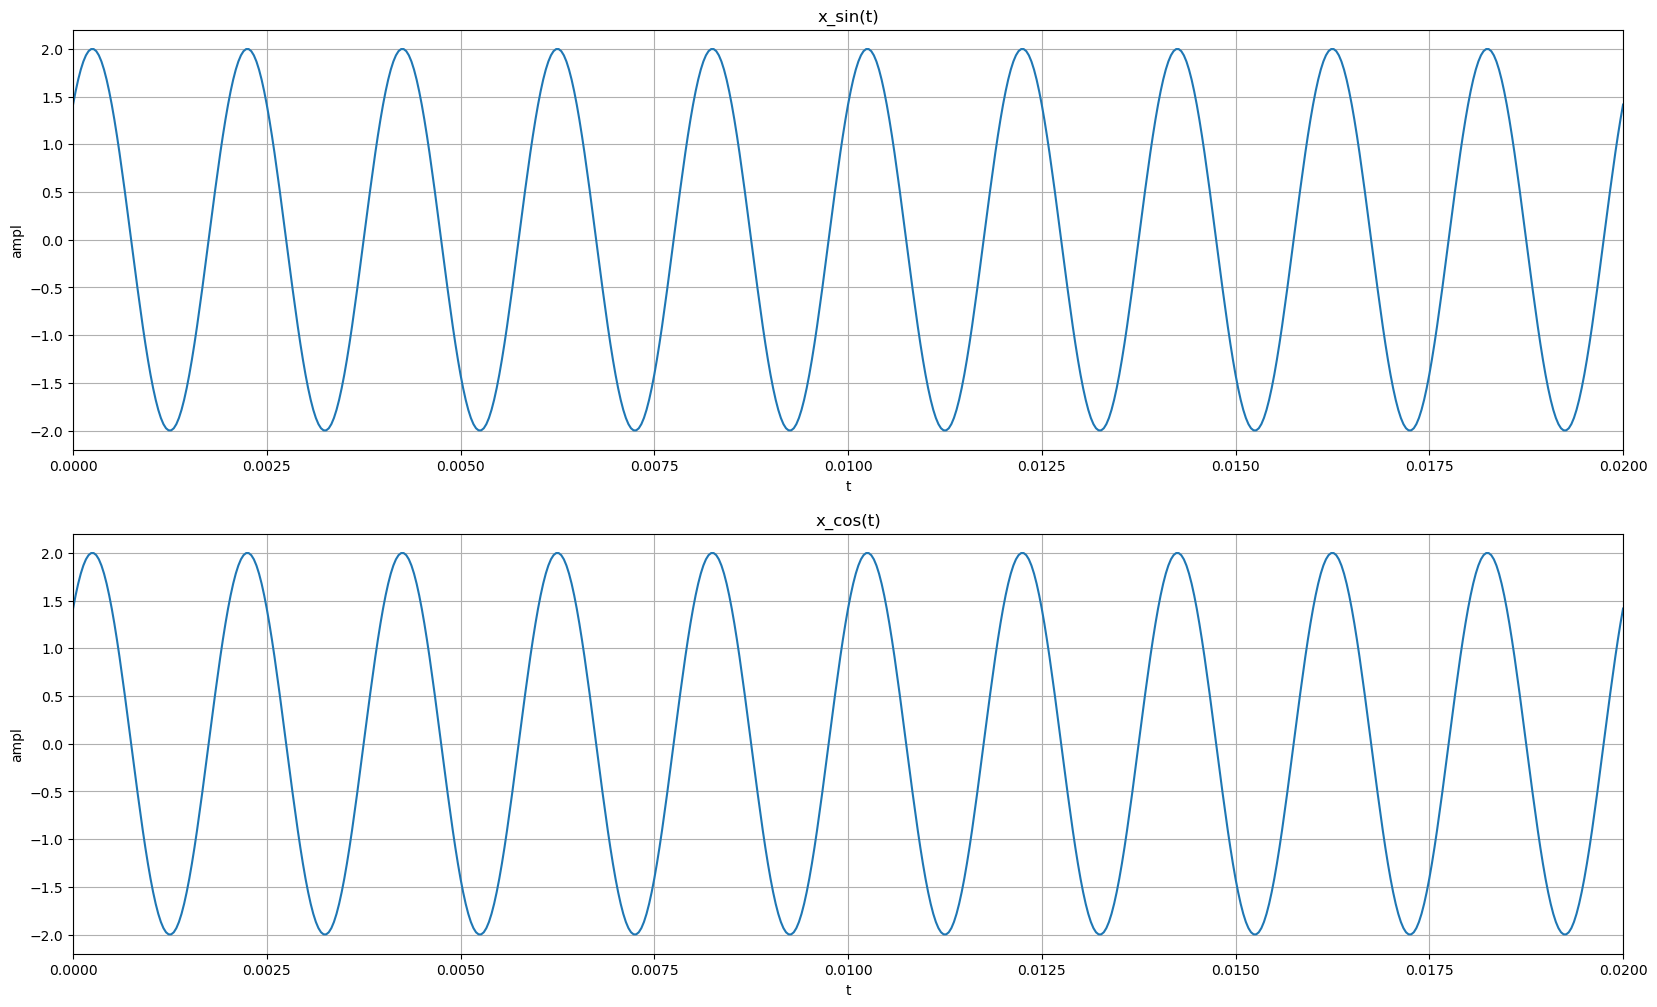

<sounddevice.CallbackFlags: output underflow>

In [194]:
os.makedirs("./lab2_plots/ex1", exist_ok=True)

ampl = 2
frecv = 500
faza_sin = np.pi/4
durata = 2
rata_esantionare = 30000
n_esantioane = rata_esantionare*durata
t = np.linspace(0, durata, int(n_esantioane))
x_sin = ampl * np.sin(2*np.pi*frecv*t+faza_sin)

faza_cos = faza_sin-np.pi/2
x_cos = ampl * np.cos(2*np.pi*frecv*t+faza_cos)

fig, axs = plt.subplots(2, figsize=(20, 12))

L = [x_sin, x_cos]
for ax, i in zip(axs, L):
    ax.plot(t, i)
    ax.set_xlabel('t')
    ax.set_ylabel('ampl')
    ax.grid(True)
    ax.set_xlim(0, 0.02)
axs[0].set_title('x_sin(t)')
axs[1].set_title('x_cos(t)')
plt.savefig(fname="./lab2_plots/ex1/random_sin_echival_cos.pdf", format="pdf")
plt.show()

# wav.write('./lab2_plots/ex1/sine_signal.wav', rata_esantionare, x_sin)
# wav.write('./lab2_plots/ex1/cosine_signal.wav', rata_esantionare, x_cos)

sounddevice.play(x_sin, rata_esantionare)
sounddevice.wait()
sounddevice.play(x_cos, rata_esantionare)
sounddevice.wait()


Ex2

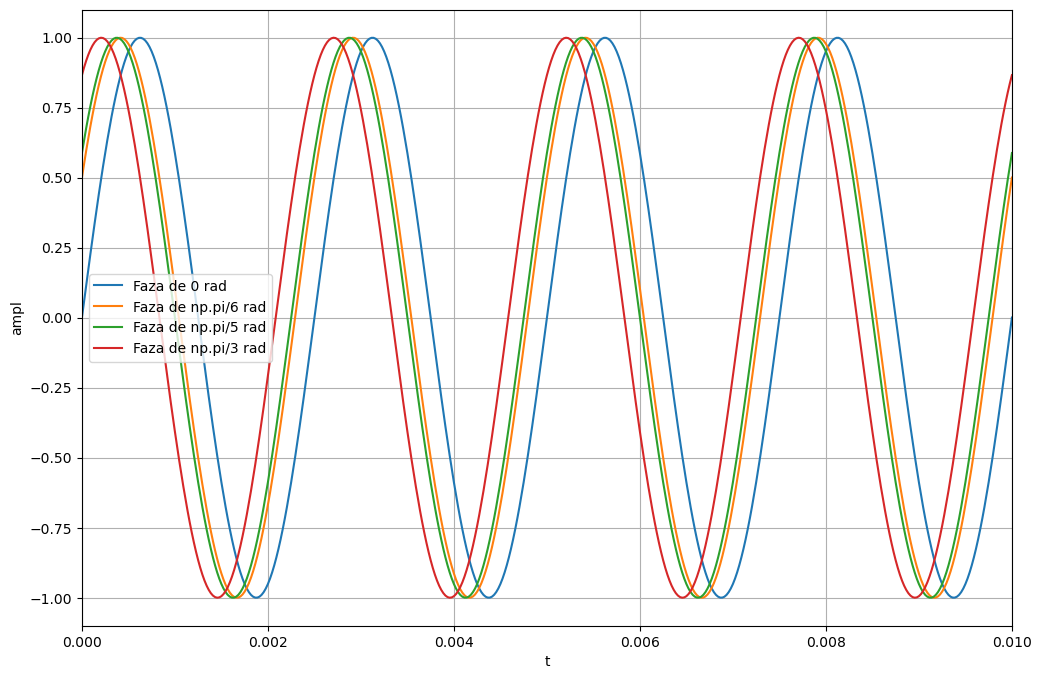

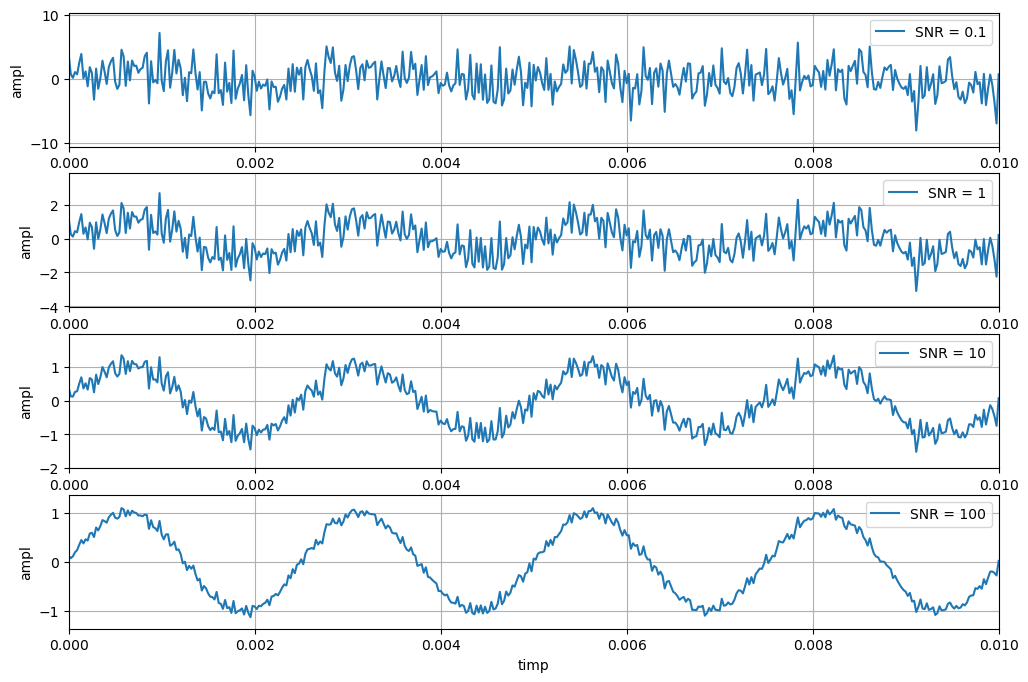

In [195]:
os.makedirs("lab2_plots/ex2", exist_ok=True)

ampl = 1
frecv = 400
l_faza_sin = [0, np.pi/6, np.pi/5, np.pi/3]
durata = 1
rata_esantionare = 44000
n_esantioane = rata_esantionare*durata
t = np.linspace(0, durata, int(n_esantioane))
L_x_sin = [ampl * np.sin(2*np.pi*frecv*t+faza) for faza in l_faza_sin]

x = L_x_sin[0] # se adauga zgomot la primul semnal
z = np.random.normal(0, durata, n_esantioane) # vector de zgomot Gaussian pe toata durata semnalului

L_snr = [0.1, 1, 10, 100]

plt.figure(figsize=(12, 8))
for i, x_sin in enumerate(L_x_sin):
    if i == 0: # nu merge sa fac asta sub forma de axs[i] inafara for-ului deoarece vreau sa am o singura figura cu toate semnalele
        plt.plot(t, x_sin, label=f'Faza de 0 rad')
    elif i == 1:
        plt.plot(t, x_sin, label=f'Faza de np.pi/6 rad')
    elif i == 2:
        plt.plot(t, x_sin, label=f'Faza de np.pi/5 rad')
    else:
        plt.plot(t, x_sin, label=f'Faza de np.pi/3 rad')
    plt.xlim(0, 0.01)
    sounddevice.play(x_sin, rata_esantionare)
    sounddevice.wait()

plt.xlabel("t")
plt.ylabel("ampl")
plt.legend()
plt.grid(True)
plt.savefig(fname="./lab2_plots/ex2/test.pdf", format="pdf")
plt.show()

fig, axs = plt.subplots(4, figsize=(12, 8))
for i, snr in enumerate(L_snr): # plotare cu zgomot
    gamma = np.linalg.norm(x)/(np.sqrt(snr) * np.linalg.norm(z))
    x_sin_zgomot = x+gamma*z

    axs[i].plot(t, x_sin_zgomot, label=f'SNR = {snr}')
    axs[i].set_xlim(0, 0.01)
    axs[i].set_xlabel("timp")
    axs[i].set_ylabel("ampl")
    axs[i].legend()
    axs[i].grid(True)

    sounddevice.play(x_sin_zgomot, rata_esantionare)
    sounddevice.wait()

plt.savefig(fname="./lab2_plots/ex2/snr.pdf", format="pdf")
plt.show()


Ex3

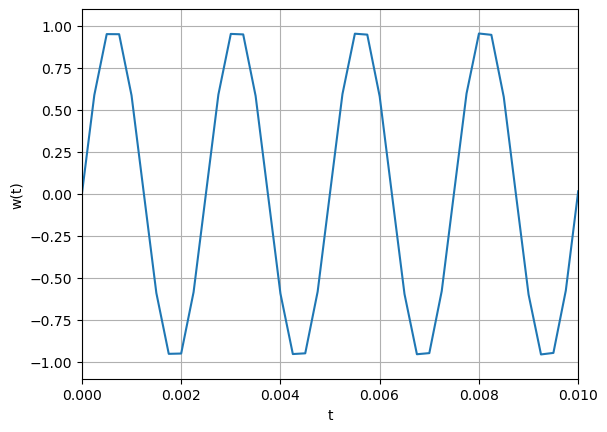

<sounddevice.CallbackFlags: output underflow>

In [196]:
os.makedirs("lab2_plots/ex3", exist_ok=True)

n_esantioane = 1600
frecv = 400
rata_esantionare = 4000 # adaugat de mine, nu e in lab1
durata = n_esantioane/rata_esantionare
t = np.linspace(0, durata, int(n_esantioane))
w = np.sin(2*np.pi*frecv*t)
plt.plot(t, w)
plt.xlabel('t')
plt.ylabel('w(t)')
plt.xlim([0, 0.01]) # se vad bine reprezentarile esantioanelor la val mult mai mici decat 4
plt.grid(True)
plt.savefig(fname="./lab2_plots/ex3/2a.pdf", format="pdf")
plt.show()

sounddevice.play(w, rata_esantionare)
sounddevice.wait()

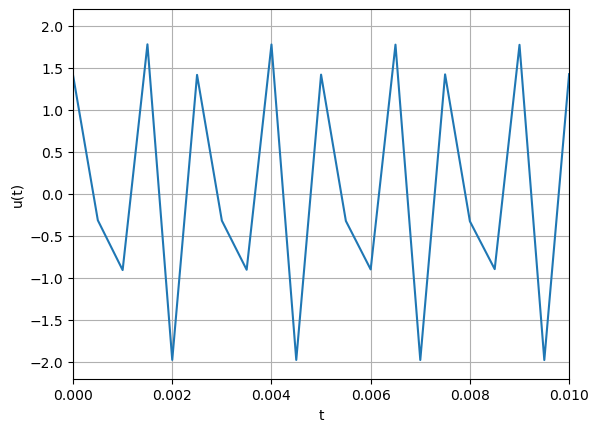

In [197]:
frecv = 800
durata = 3
rata_esantionare = 2000
n_esantioane = durata*rata_esantionare
t = np.linspace(0, durata, int(n_esantioane))
u = 2*np.sin(2*np.pi*frecv*t + np.pi/4)

wav.write('./lab2_plots/ex3/2b_sawtooth.wav', rata_esantionare, u)
rata_aux, u_aux = wav.read('./lab2_plots/ex3/2b_sawtooth.wav')

sounddevice.play(u, rata_esantionare)
sounddevice.wait()

plt.plot(t, u_aux) # might as well plot u_aux
plt.xlabel('t')
plt.ylabel('u(t)')
plt.xlim([0, 0.01])
plt.grid(True)
plt.savefig(fname="./lab2_plots/ex3/2b.pdf", format="pdf")
plt.show()

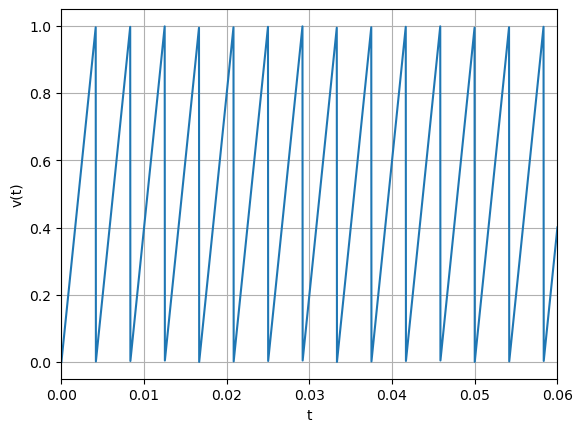

<sounddevice.CallbackFlags: output underflow>

In [198]:
frecv = 240
rata_esantionare = 44100
durata = 2
n_esantioane = durata*rata_esantionare
t = np.linspace(0, durata, int(n_esantioane))
#u = signal.sawtooth(2 * np.pi * 5 * t)
ampl = 1
v = ampl*(frecv*t-np.floor(frecv*t))
plt.plot(t, v)
plt.xlabel('t')
plt.ylabel('v(t)')
plt.grid(True)
plt.xlim([0, 0.06])
plt.savefig(fname="./lab2_plots/ex3/2c.pdf", format="pdf")
plt.show()

sounddevice.play(v, rata_esantionare)
sounddevice.wait()

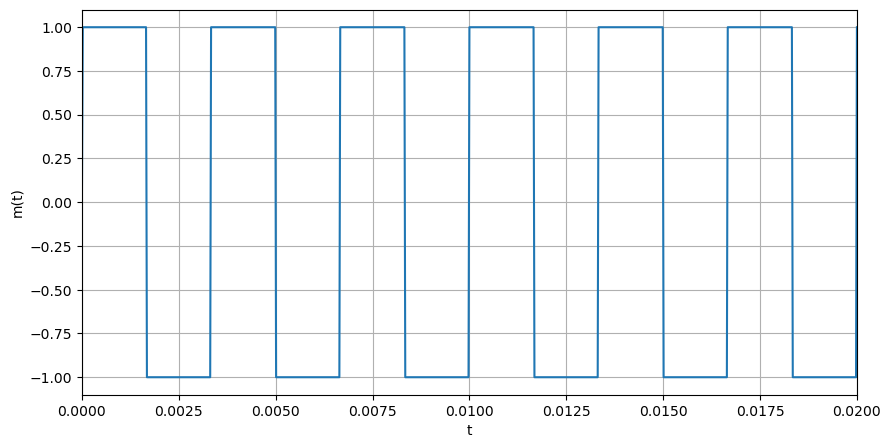

<sounddevice.CallbackFlags: output underflow>

In [199]:
frecv = 300
durata = 1
rata_esantionare = 44100
n_esantioane = durata*rata_esantionare
t = np.linspace(0, durata, int(n_esantioane))
ampl = 1
m = ampl*np.sign(np.sin(2*np.pi*frecv*t))

plt.figure(figsize=(10, 5))
plt.plot(t, m)
plt.xlabel('t')
plt.ylabel('m(t)')
plt.grid(True)
plt.xlim([0, 0.02])
plt.savefig(fname="./lab2_plots/ex3/2d.pdf", format="pdf")
plt.show()

sounddevice.play(m, rata_esantionare)
sounddevice.wait()

Ex4

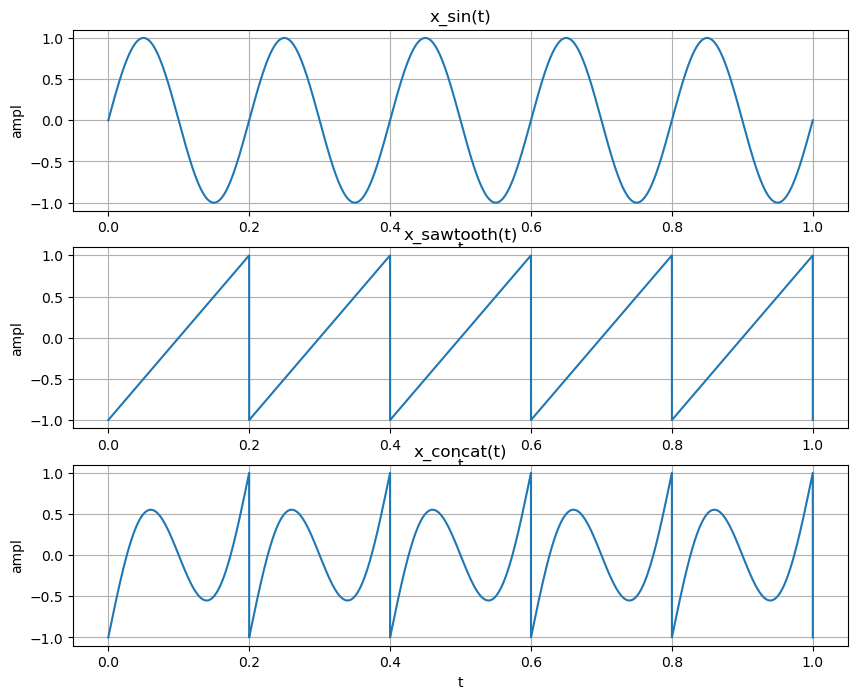

In [200]:
os.makedirs("lab2_plots/ex4", exist_ok=True)

frecv = 5
rata_esantionare = 30000
durata = 1
n_esantioane = rata_esantionare*durata
t = np.linspace(0, durata, int(n_esantioane))
x_sin = np.sin(2*np.pi*frecv*t)
x_sawtooth = signal.sawtooth(2*np.pi*frecv*t)
x_concat = x_sin+x_sawtooth

fig, axs = plt.subplots(3, 1, figsize=(10, 8))
L = [x_sin, x_sawtooth, x_concat]
for ax, i in zip(axs, L):
    ax.plot(t, i)
    ax.set_xlabel('t')
    ax.set_ylabel('ampl')
    ax.grid(True)
    sounddevice.play(i, rata_esantionare)
    sounddevice.wait()

axs[0].set_title('x_sin(t)')
axs[1].set_title('x_sawtooth(t)')
axs[2].set_title('x_concat(t)')
plt.savefig(fname="./lab2_plots/ex4/combo_sin_sawtooth.pdf", format="pdf")
plt.show()

Ex5

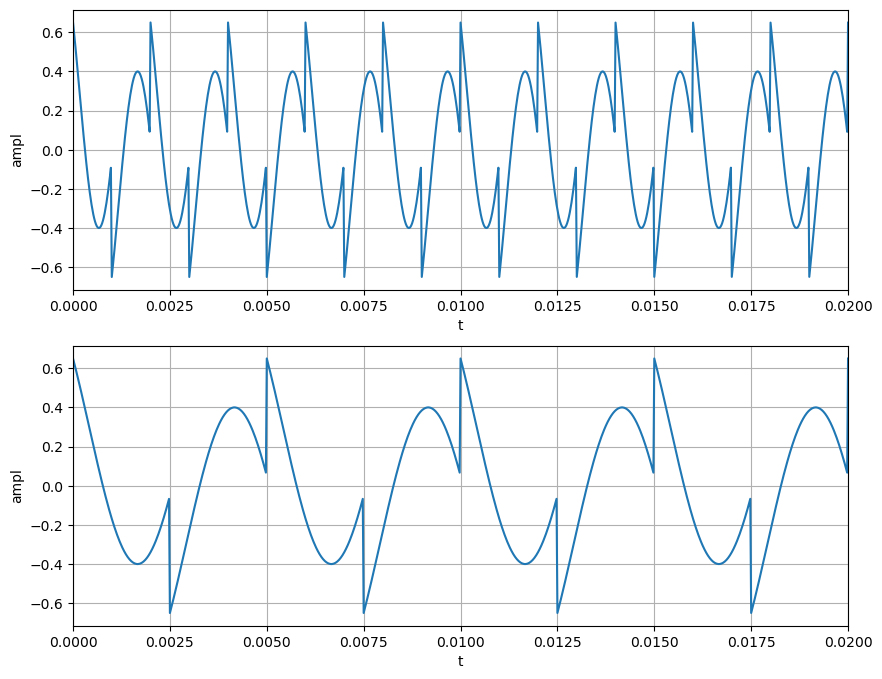

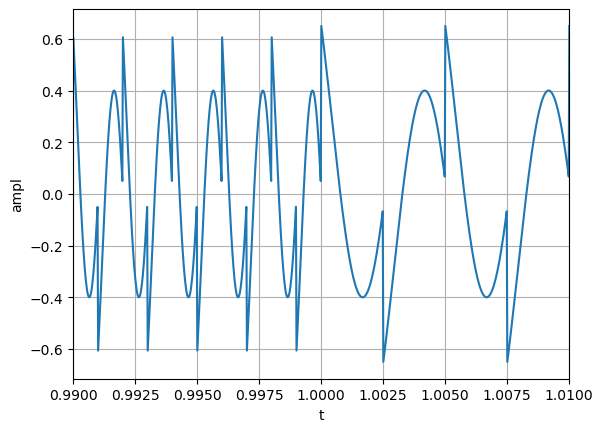

<sounddevice.CallbackFlags: output underflow>

In [201]:
os.makedirs("lab2_plots/ex5", exist_ok=True)

frecv1 = 500
frecv2 = 200
rata_esantionare = 44000
durata = 1
n_esantioane = rata_esantionare*durata
t = np.linspace(0, durata, int(n_esantioane))

x_res1 = 0.7*np.cos(2*np.pi*frecv1*t+np.pi/3)+0.3*signal.square(2*np.pi*frecv1*t)

x_res2 = 0.7*np.cos(2*np.pi*frecv2*t+np.pi/3)+0.3*signal.square(2*np.pi*frecv2*t)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
L = [x_res1, x_res2]
for ax, i in zip(axs, L):
    ax.plot(t, i)
    ax.set_xlabel('t')
    ax.set_ylabel('ampl')
    ax.grid(True)
    ax.set_xlim(0, 0.02)

    sounddevice.play(i, rata_esantionare)
    sounddevice.wait()

plt.savefig(fname="./lab2_plots/ex5/semnale_aceeasi_unda.pdf", format="pdf")
plt.show()

x_concat = np.concatenate((x_res1, x_res2))
t_concat = np.linspace(0, 2*durata, 2*int(n_esantioane))

plt.plot(t_concat, x_concat)
plt.xlabel('t')
plt.ylabel('ampl')
plt.grid(True)
plt.xlim(0.99, 1.010)
plt.savefig(fname="./lab2_plots/ex5/semnale_aceeasi_unda_concat.pdf", format="pdf")
plt.show()

sounddevice.play(x_concat, rata_esantionare)
sounddevice.wait()


Ex6

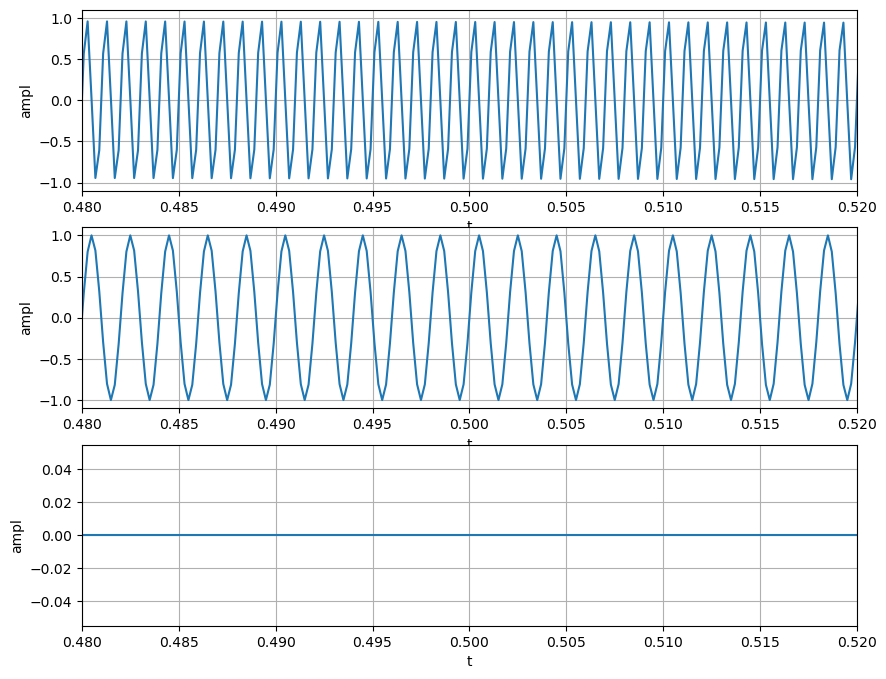

In [202]:
os.makedirs("lab2_plots/ex6", exist_ok=True)

frecv = 2000
durata = 1
rata_esantionare = 5000
n_esantioane = rata_esantionare*durata
t = np.linspace(0, durata, int(n_esantioane))
f1 = frecv/2
f2 = frecv/4
f3 = 0
ampl = 1
x1 = ampl*np.sin(2*np.pi*f1*t)
x2 = ampl*np.sin(2*np.pi*f2*t)
x3 = ampl*np.sin(2*np.pi*f3*t) # np.sin(0) = vector zero constant

fig, axs = plt.subplots(3, 1, figsize=(10, 8))
L = [x1, x2, x3]
for ax, i in zip(axs, L):
    ax.plot(t, i)
    ax.set_xlabel('t')
    ax.set_ylabel('ampl')
    ax.grid(True)
    ax.set_xlim(0.48, 0.52)

    sounddevice.play(i, rata_esantionare)
    sounddevice.wait()

plt.savefig(fname="./lab2_plots/ex6/fs_dif.pdf", format="pdf")
plt.show()

Ex7

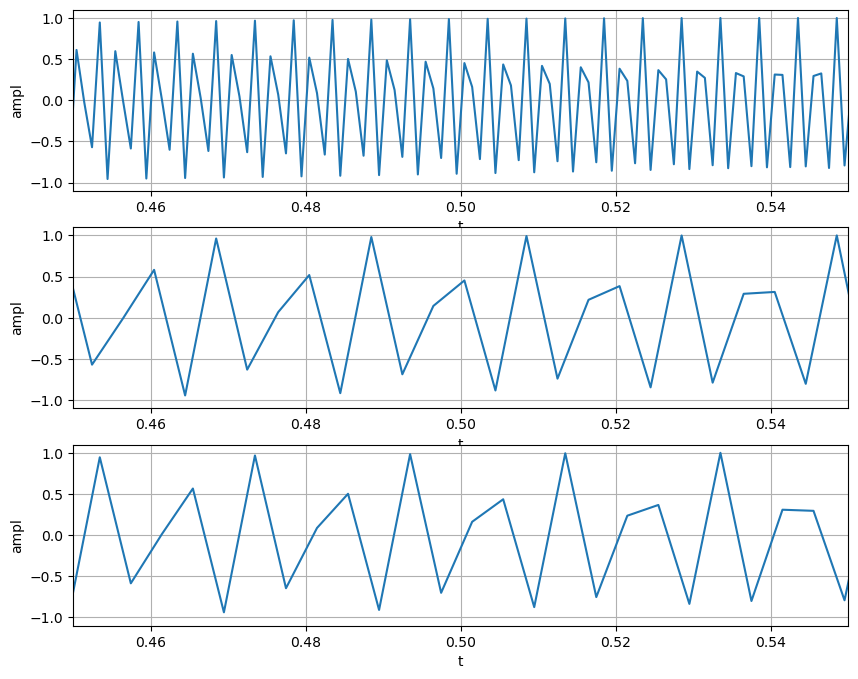

In [203]:
os.makedirs("lab2_plots/ex7", exist_ok=True)

frecv = 600
durata = 1
t = np.linspace(0, durata, 1000)
x = np.sin(2*np.pi*frecv*t+np.pi/4)
x_decim1 = x[::4] # decimare cu factor 4, adica pastrez doar fiecare al 4-lea esantion
t_decim1 = t[::4] # pornire de la primul esantion
x_decim2 = x[1::4] # pornire de la al doilea esantion
t_decim2 = t[1::4]

fig, axs = plt.subplots(3, 1, figsize=(10, 8))
axs[0].plot(t, x)
axs[1].plot(t_decim1, x_decim1)
axs[2].plot(t_decim2, x_decim2)
for ax in axs:
    ax.set_xlabel('t')
    ax.set_ylabel('ampl')
    ax.grid(True)
    ax.set_xlim(0.45, 0.55)

plt.savefig(fname="./lab2_plots/ex7/decimare.pdf", format="pdf")
plt.show()


Ex8

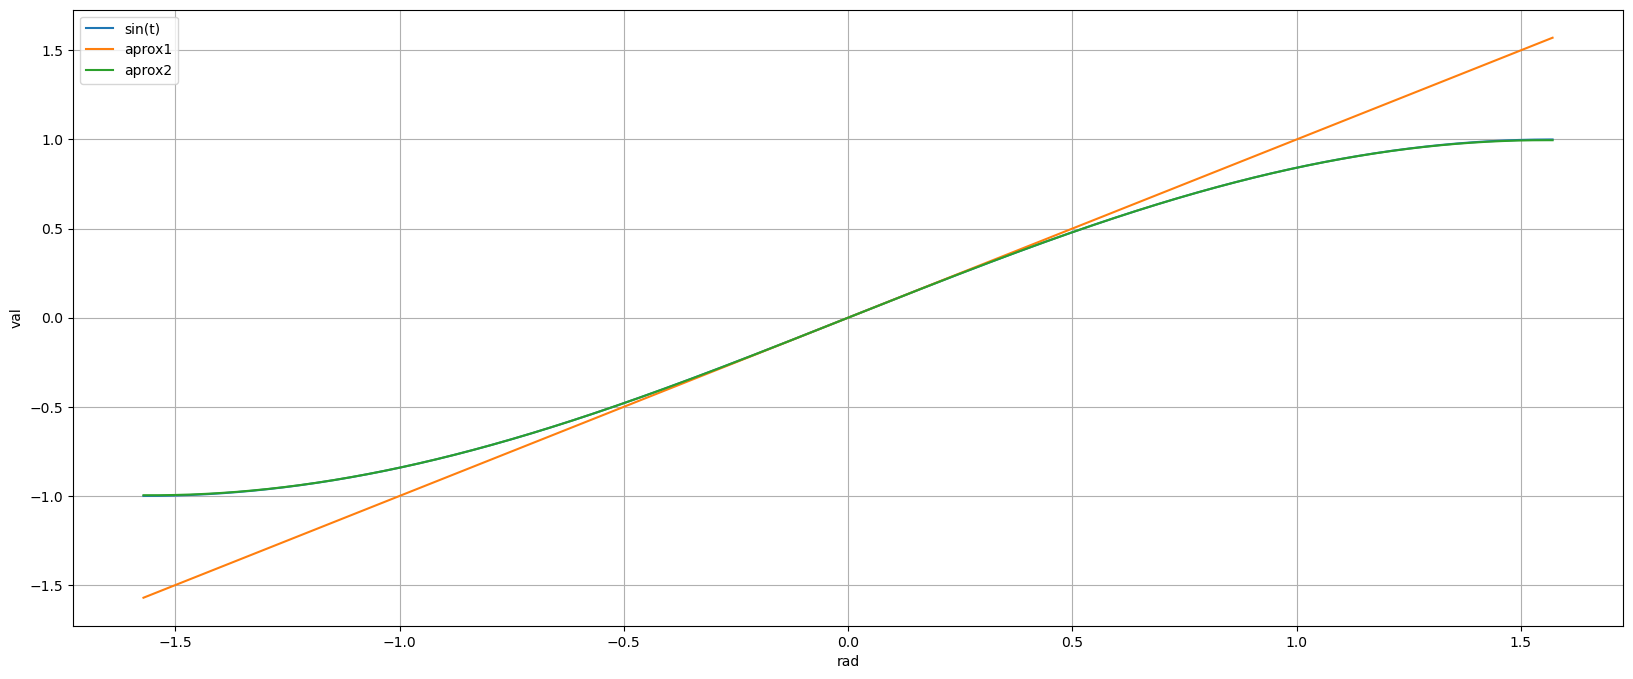

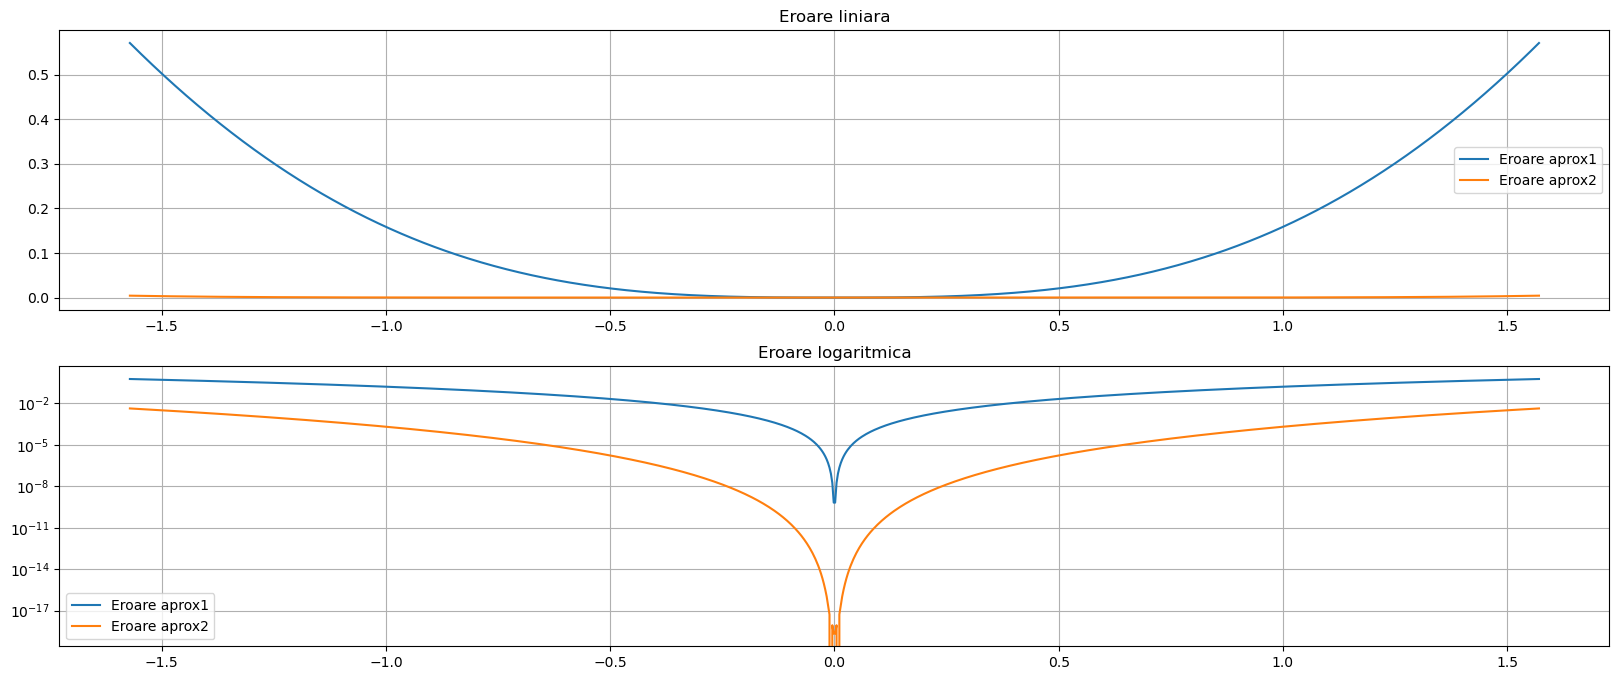

In [ ]:
os.makedirs("lab2_plots/ex8", exist_ok=True)

t = np.linspace(-np.pi/2, np.pi/2, 1000) # curbele in exact acest interval de val reale
x_sin = np.sin(t)
aprox1 = t # sin(t) = t, Taylor
aprox2 = (t-(7*t**3)/60)/(1+(t**2)/20) # Pade

eroare_aprox1 = np.abs(x_sin-aprox1)
eroare_aprox2 = np.abs(x_sin-aprox2)

plt.figure(figsize=(20, 8))
plt.plot(t, x_sin, label='sin(t)') # coresp cu Taylor
plt.plot(t, aprox1, label='aprox1')
plt.plot(t, aprox2, label='aprox2')
plt.xlabel('rad')
plt.ylabel('val')
plt.legend()
plt.grid(True)
plt.savefig(fname="./lab2_plots/ex8/taylor_pade.pdf", format="pdf")
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(20, 8))
L = [(eroare_aprox1, eroare_aprox2)]*2
for ax, i in zip(axs, L):
    a, b = i
    ax.plot(t, a, label='Eroare aprox1')
    ax.plot(t, b, label='Eroare aprox2')
    ax.legend()
    if ax is axs[1]:
        ax.set_yscale('log')
        ax.set_title('Eroare logaritmica')
    else:
        ax.set_yscale('linear')
        ax.set_title('Eroare liniara')
    #ax.set_xlabel('rad')
    ax.grid(True)

plt.savefig(fname="./lab2_plots/ex8/erori.pdf", format="pdf")
plt.show()
